In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path ='/content/drive/MyDrive/machine learning/bank.csv'

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv(path)

In [ ]:
df.shape

(45211, 17)

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
list(df.select_dtypes('object'))

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

In [ ]:
df.corr()

<ipython-input-166-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# EDA


In [ ]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
df['deposit'].value_counts()

no     39922
yes     5289
Name: deposit, dtype: int64

In [ ]:
for col in df.columns:
  col =df[col].value_counts()
  print(col)
  print('*'*25)

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64
*************************
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
*************************
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
*************************
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
*************************
no     44396
yes      815
Name: default, dtype: int64
*************************
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Len

<Axes: xlabel='deposit', ylabel='count'>

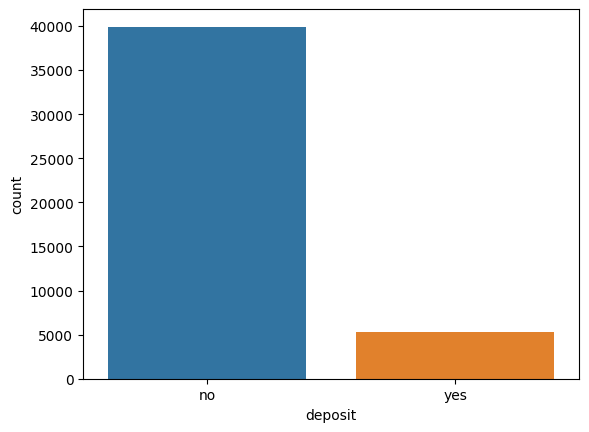

In [ ]:
sns.countplot(data = df, x = df['deposit'])

In [ ]:
df['deposit'] = df['deposit'].replace(['yes','no'],[1,0])

In [ ]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0


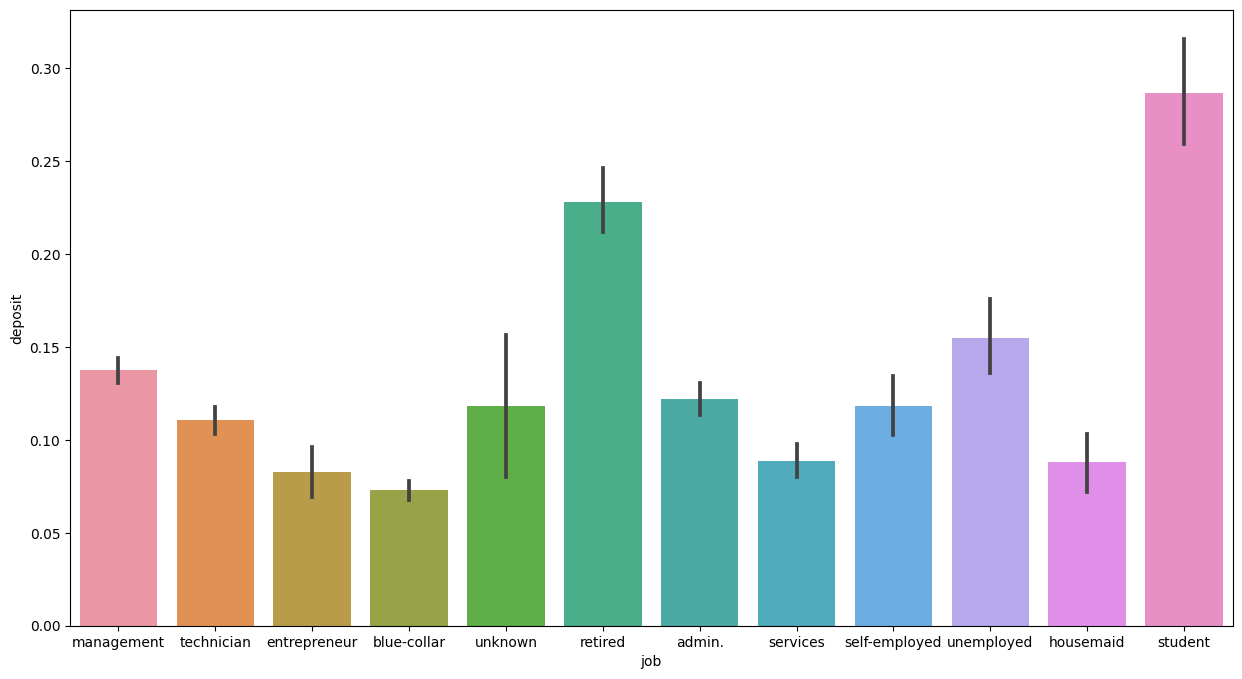

In [ ]:
plt.figure(figsize=(15,8))
ax =sns.barplot(data = df, x= df['job'], y = df['deposit'])

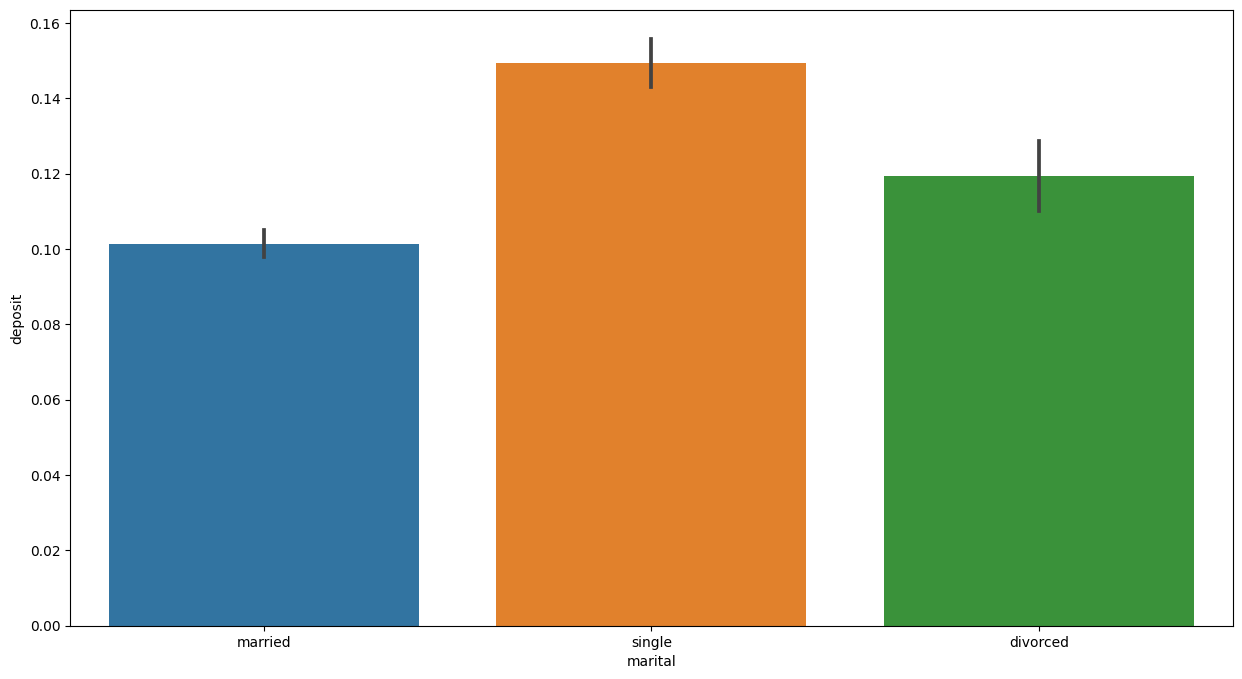

In [ ]:
plt.figure(figsize =(15,8))
ax = sns.barplot(data = df, x =df['marital'], y = df['deposit'])

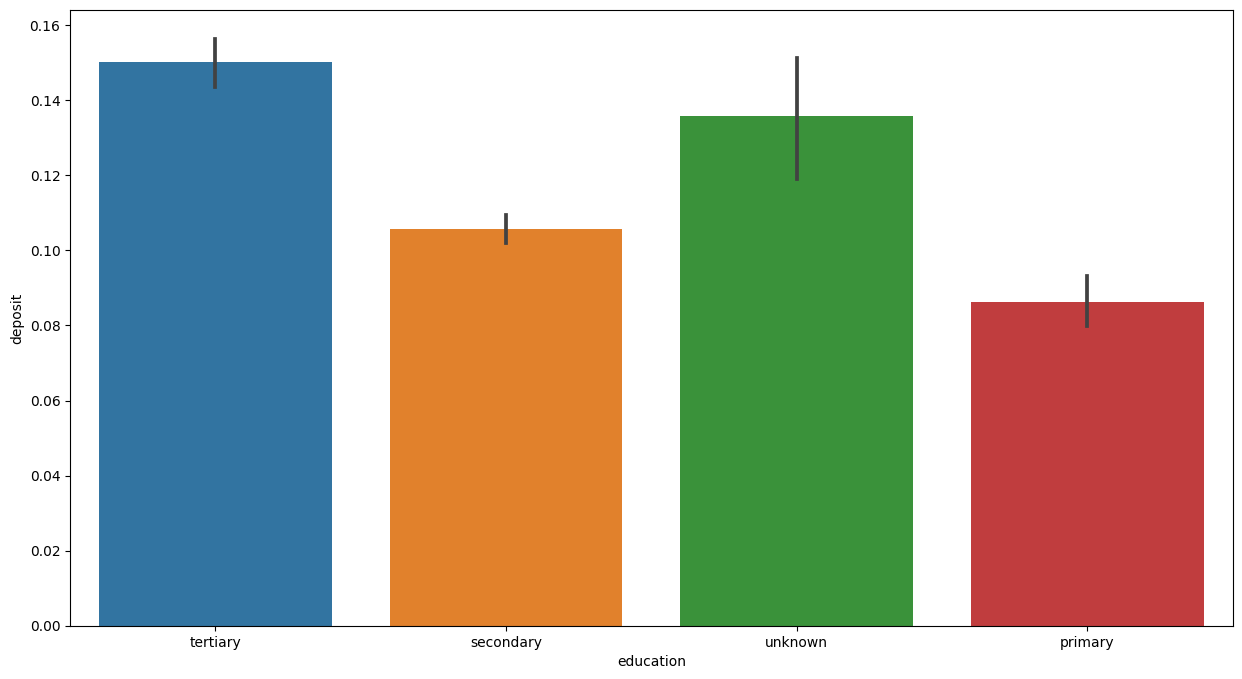

In [ ]:
plt.figure(figsize =(15,8))
ax = sns.barplot(data = df, x =df['education'], y = df['deposit'])

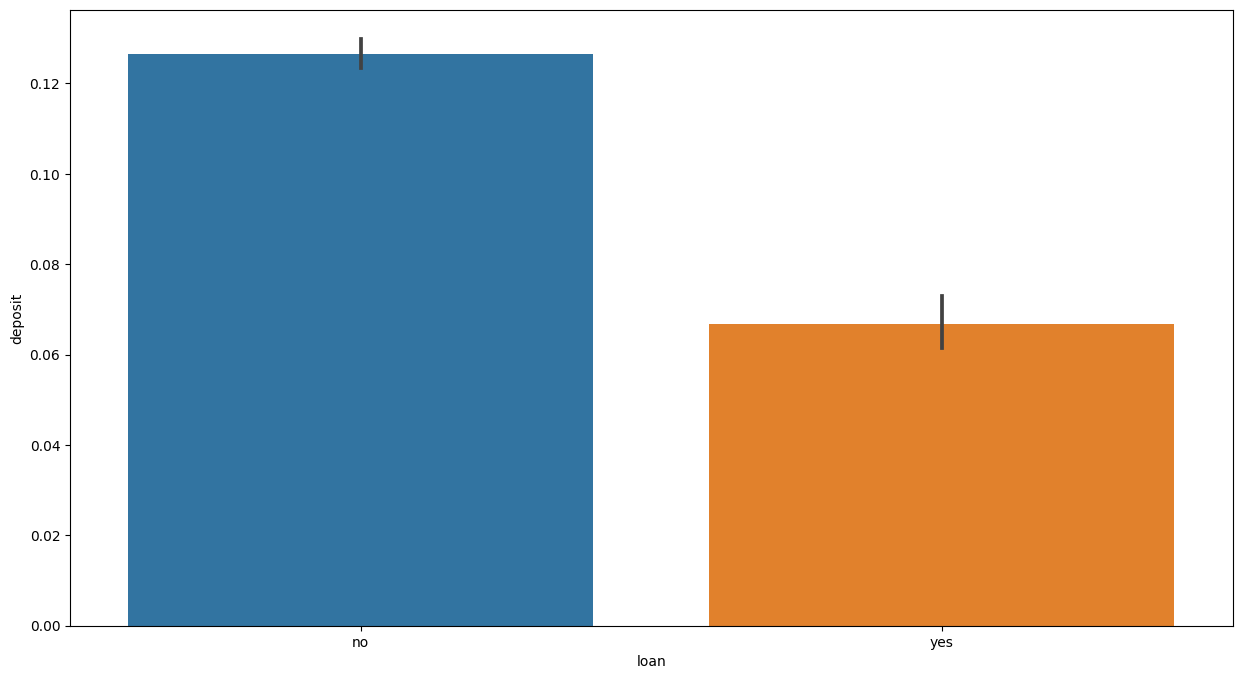

In [ ]:
plt.figure(figsize =(15,8))
ax = sns.barplot(data = df, x =df['loan'], y = df['deposit'])

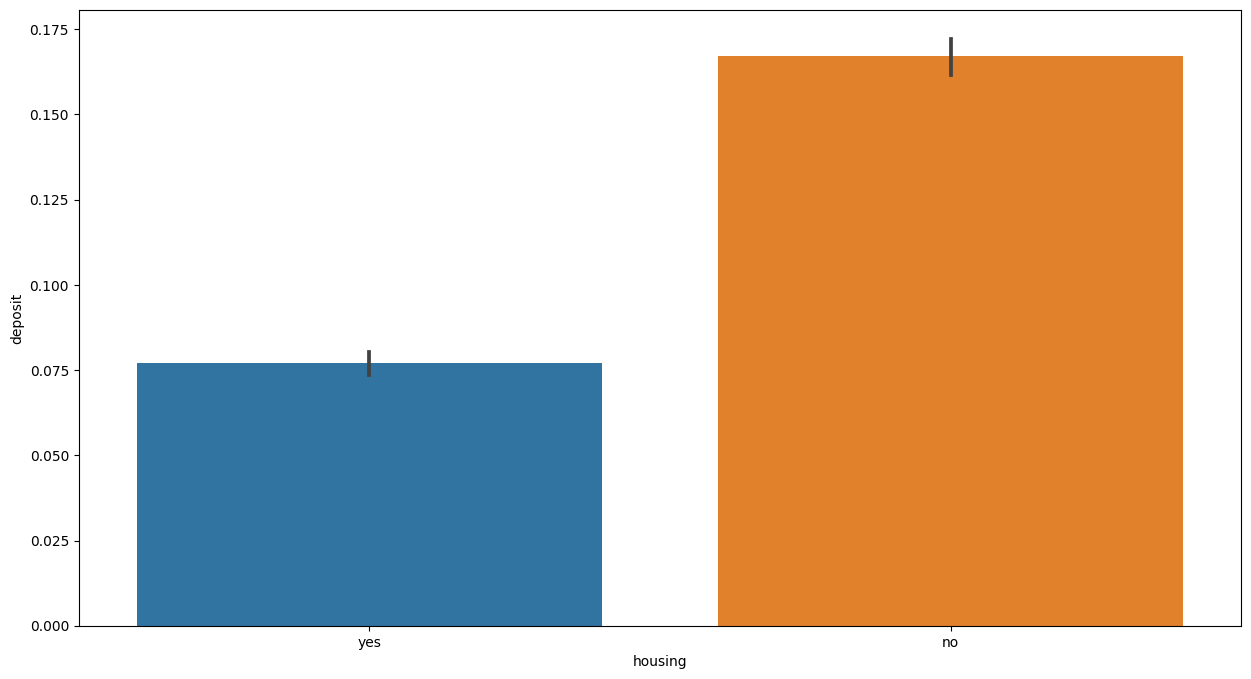

In [ ]:
plt.figure(figsize =(15,8))
ax = sns.barplot(data = df, x =df['housing'], y = df['deposit'])

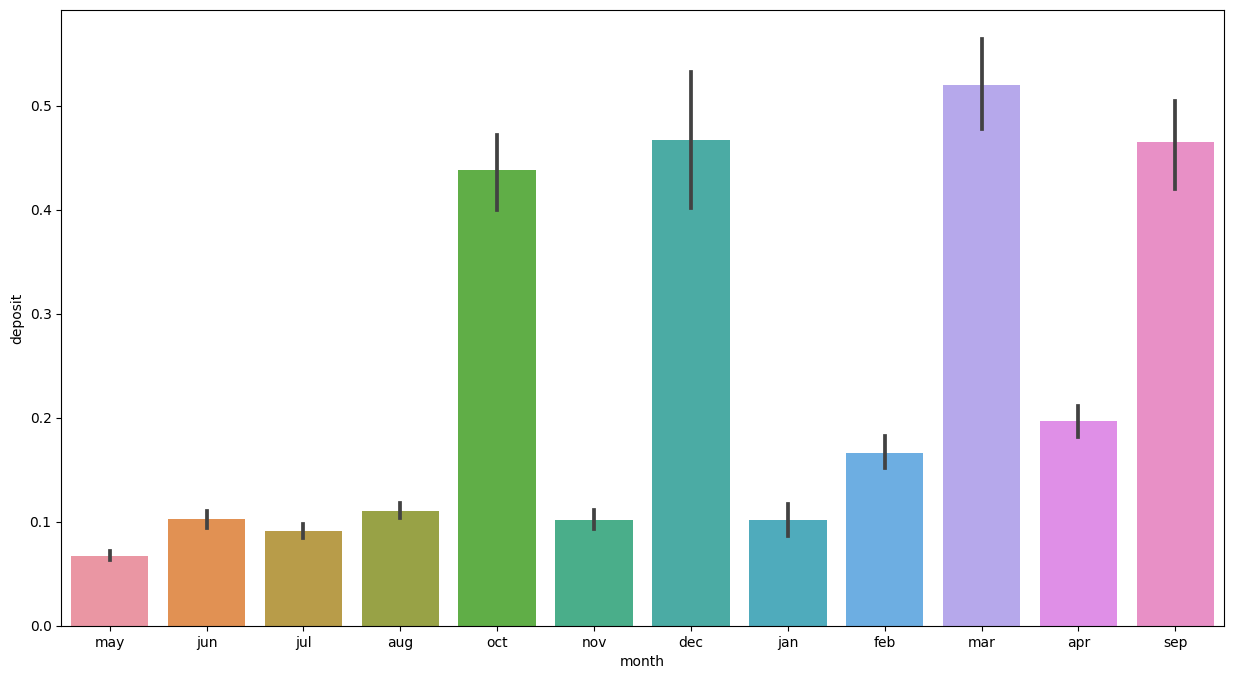

In [ ]:
plt.figure(figsize =(15,8))
ax = sns.barplot(data = df, x =df['month'], y = df['deposit'],)

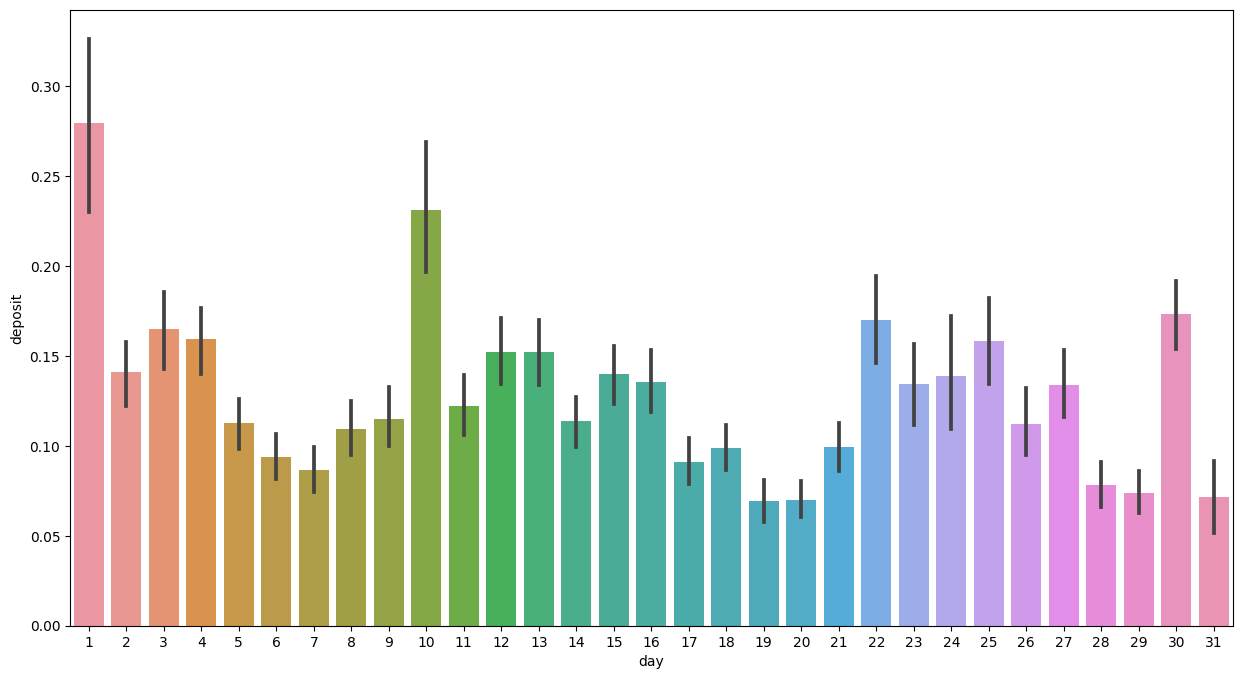

In [ ]:
plt.figure(figsize =(15,8))
ax = sns.barplot(data = df, x =df['day'], y = df['deposit'])

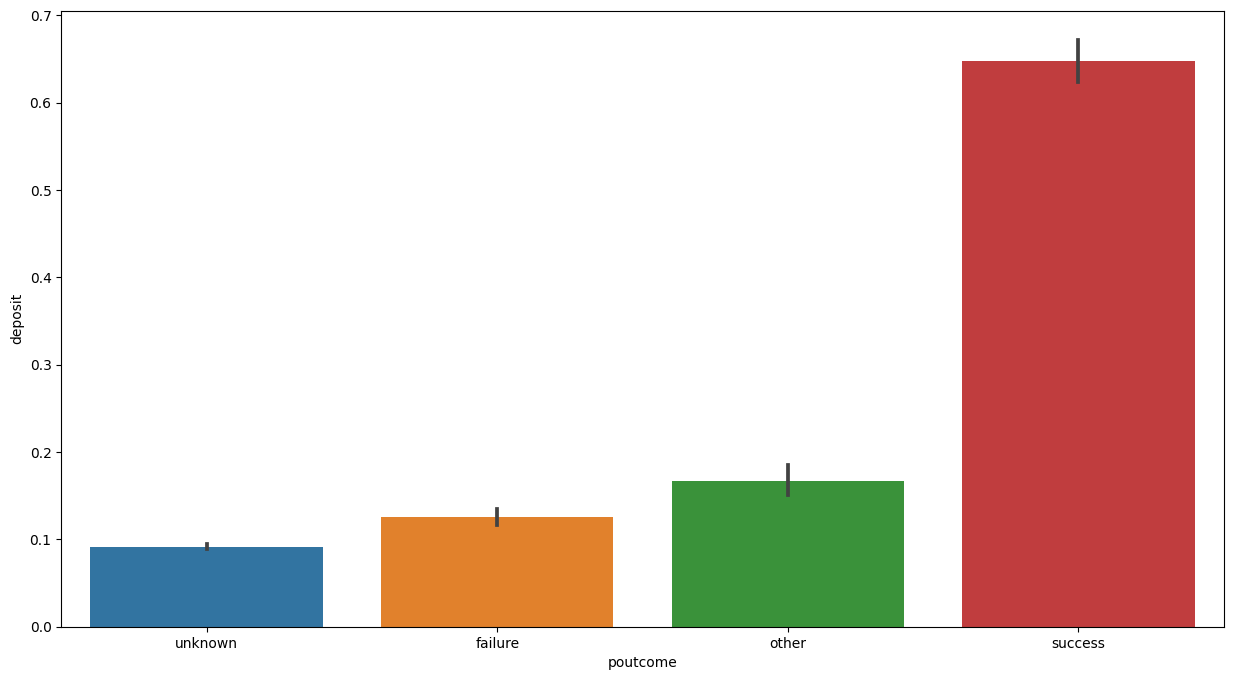

In [ ]:
plt.figure(figsize =(15,8))
ax = sns.barplot(data = df, x =df['poutcome'], y = df['deposit'])

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'deposit'}>, <Axes: >]], dtype=object)

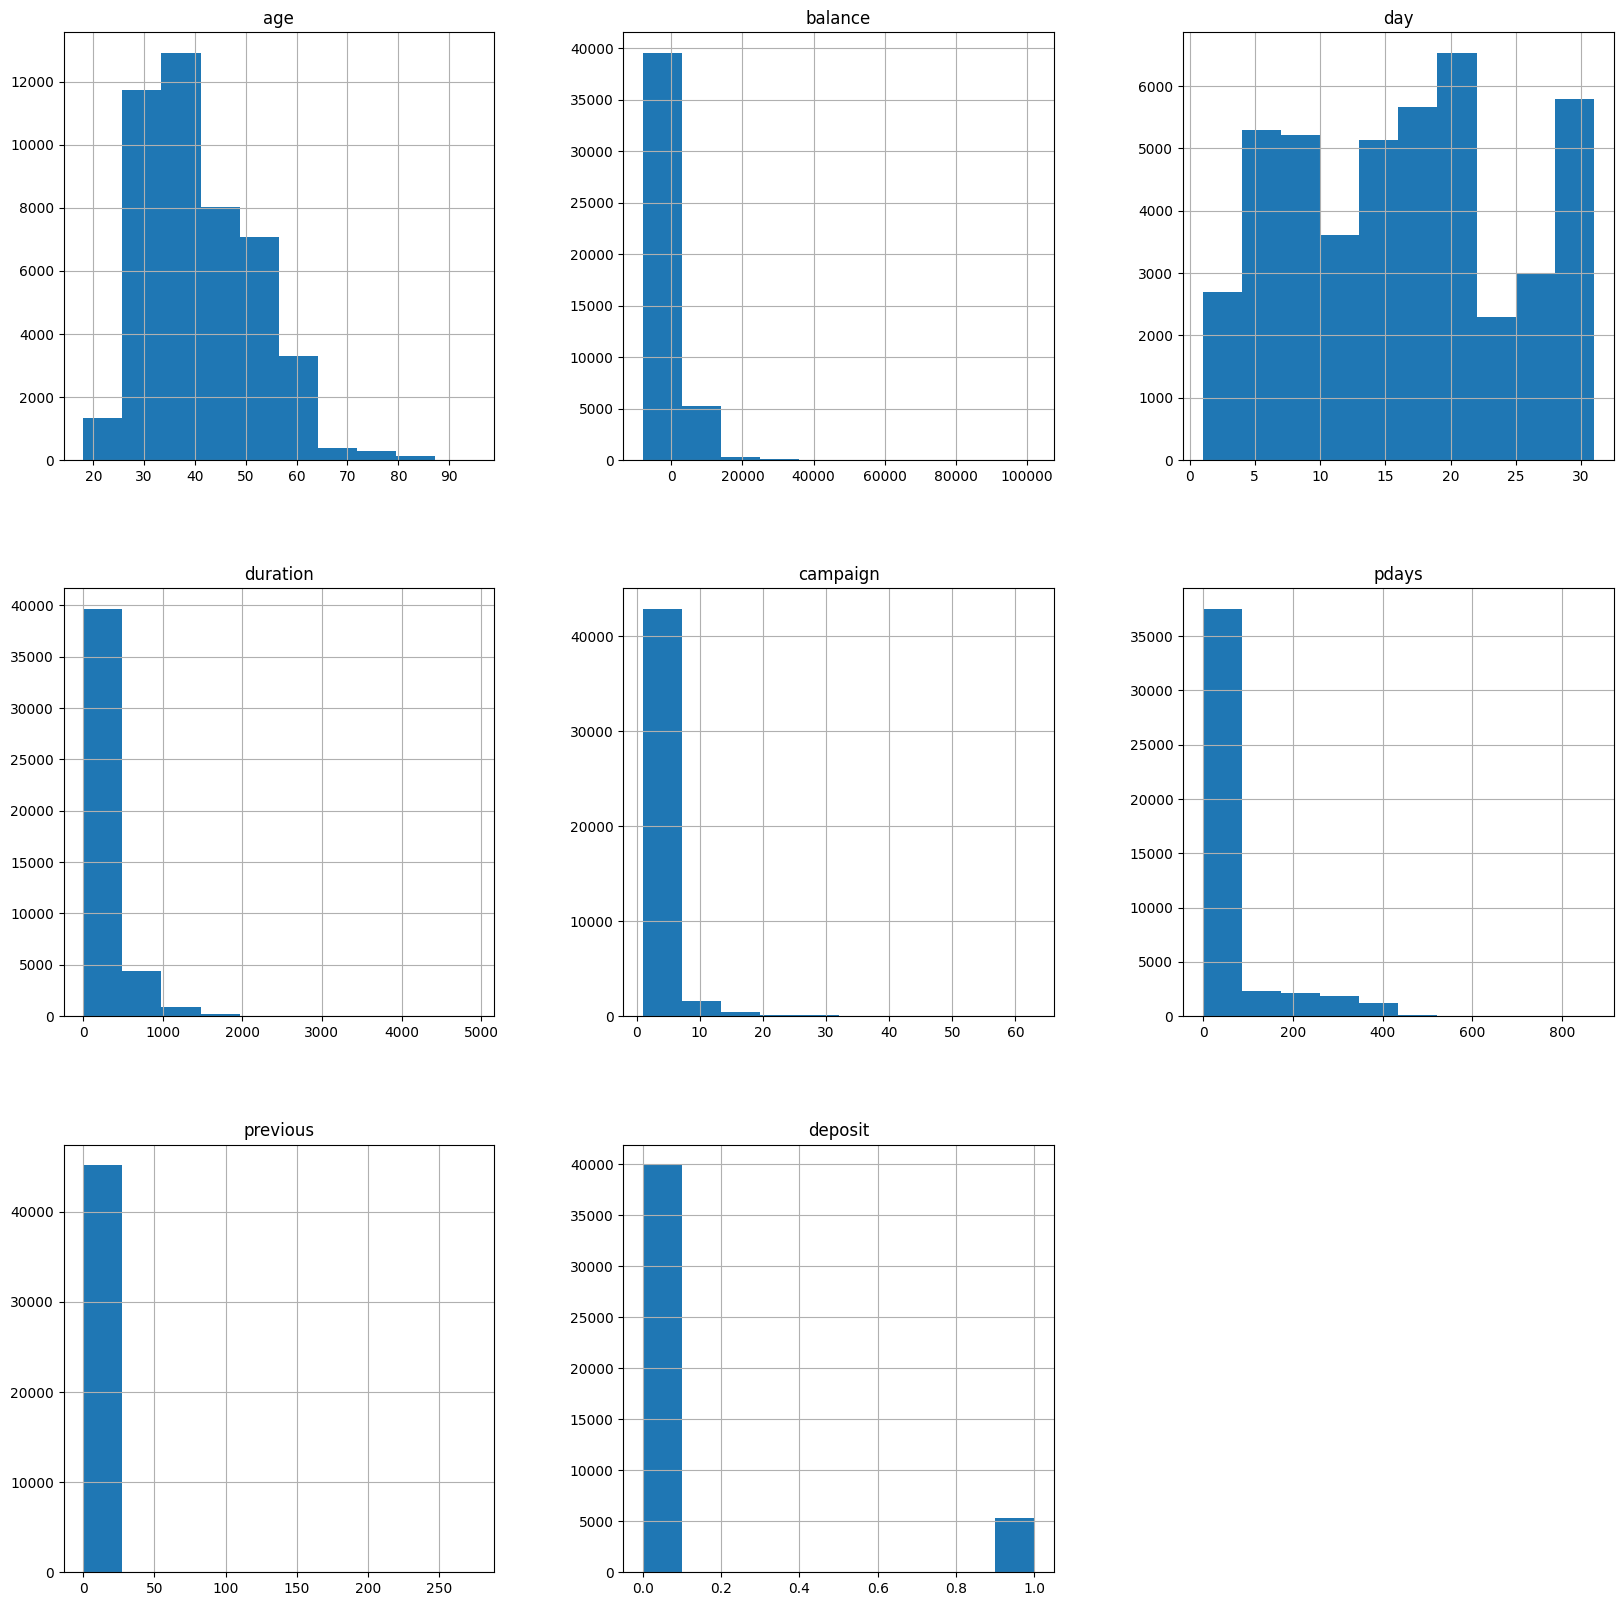

In [ ]:
df.hist(figsize = (20,20))

In [ ]:
df['deposit'].value_counts()

0    39922
1     5289
Name: deposit, dtype: int64

**We found that this data is not balanced so we have to balance it before put that into the model **

In [ ]:
df.groupby('deposit').mean()

<ipython-input-185-596924ad4cb2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('deposit').mean()


,age,balance,day,duration,campaign,pdays,previous
deposit,,,,,,,
0,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
1,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [ ]:
#  Separating the data for analysis

Deposit_yes = df[df.deposit == 1]
Deposit_No = df[df.deposit == 0]

In [ ]:
Deposit_yes.shape

(5289, 17)

In [ ]:
Deposit_No.shape

(39922, 17)

In [ ]:
# Sampling the data and built a dataset of containing similar distributions of both data we attained some random values

Deposit_No_sample = Deposit_No.sample(n = 5289)



In [ ]:
print(Deposit_No_sample.shape)
print(Deposit_yes.shape)

(5289, 17)
(5289, 17)


In [ ]:
# Concating the two datasets

new_df = pd.concat((Deposit_yes,Deposit_No_sample),axis =0)

In [ ]:
new_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8183,43,admin.,married,secondary,no,6220,yes,no,unknown,2,jun,200,2,-1,0,unknown,0
9019,43,housemaid,married,primary,no,522,no,no,unknown,5,jun,86,1,-1,0,unknown,0
30784,56,entrepreneur,married,secondary,no,1272,no,no,cellular,6,feb,290,2,-1,0,unknown,0
18010,42,blue-collar,single,primary,no,92,no,no,cellular,30,jul,86,2,-1,0,unknown,0


In [ ]:
X = new_df.iloc[:,0:16]

In [ ]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8183,43,admin.,married,secondary,no,6220,yes,no,unknown,2,jun,200,2,-1,0,unknown
9019,43,housemaid,married,primary,no,522,no,no,unknown,5,jun,86,1,-1,0,unknown
30784,56,entrepreneur,married,secondary,no,1272,no,no,cellular,6,feb,290,2,-1,0,unknown
18010,42,blue-collar,single,primary,no,92,no,no,cellular,30,jul,86,2,-1,0,unknown


In [ ]:
Y = new_df.iloc[:,-1]

In [ ]:
Y

83       1
86       1
87       1
129      1
168      1
        ..
8183     0
9019     0
30784    0
18010    0
14453    0
Name: deposit, Length: 10578, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y , test_size = 0.2 , random_state = 2)

In [ ]:
x_train.shape

(8462, 16)

In [ ]:
x_test.shape

(2116, 16)

In [ ]:
list(new_df.select_dtypes('object'))

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

# Applying Logistic Regression


In [ ]:
col_trans = make_column_transformer((OneHotEncoder(sparse_output = False , drop='first'),['job','marital','education','default','housing','loan','contact','month','poutcome']), remainder = 'passthrough')

In [ ]:
sc = StandardScaler()

In [ ]:
model_LR = LogisticRegression()


In [ ]:
pipe = make_pipeline(col_trans,sc,model_LR)

In [ ]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
y_pred_lr = pipe.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_lr)

0.8246691871455577

# Applying SVM

In [ ]:
classifier = svm.SVC(kernel ='linear')

In [ ]:
pipe_1 = make_pipeline(col_trans,sc,classifier)

In [ ]:
pipe_1.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [ ]:
y_pred_svc = pipe_1.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_svc)

0.8293950850661626

# Applying RandomForest




In [ ]:
Rf = RandomForestClassifier()

In [ ]:
pipe_rf = make_pipeline(col_trans,sc, Rf)

In [ ]:
pipe_rf.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
y_pred_rf = pipe_rf.predict(x_test)

In [ ]:
accuracy_score(y_pred_rf,y_test)

0.8610586011342155

In [ ]:
print('Logistic Regression :  ' ,accuracy_score(y_pred_lr,y_test))
print('SVM :  ', accuracy_score(y_pred_svc,y_test))
print('Random Forest :   ',accuracy_score(y_pred_rf,y_test))

Logistic Regression :   0.8246691871455577
SVM :   0.8293950850661626
Random Forest :    0.8610586011342155
